In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
#import cv2 as cv
import pandas as pd
#import pygame

In [14]:
import numpy as np

v = np.array([[0.23858618, 0.59558158, 0.25612911], [0.57041804, -0.47466130, -0.87623557], [0.78593887, -0.64805805, 0.40817780]])
w = np.array([1.59774775, 0.72114198, 0.25111027])

w = np.diag(w)

A = v @ w @ np.linalg.inv(v)

print(A)
W,v = np.linalg.eig(A)
print(v,w)



[[0.94 0.22 0.04]
 [0.52 0.65 0.53]
 [0.72 0.55 0.98]]
[[ 0.23858618  0.59558158  0.25612911]
 [ 0.57041804 -0.4746613  -0.87623556]
 [ 0.78593886 -0.64805805  0.4081778 ]] [[1.59774775 0.         0.        ]
 [0.         0.72114198 0.        ]
 [0.         0.         0.25111027]]


# Capítulo 5

# Parte 1

# Exercício 1
**Objetivo: Executar um sistema dinâmico e procurar por pontos de estabilidade**


No [capítulo 2](02-sistemas_lineares.ipynb), usamos uma matriz para representar dois sistemas que operam dinamicamente: a população de carcarás e sapos numa região fictícia, e a dinâmica de navegação de um web-surfista aleatório. Se precisar, revise esse material!

Esses dois sistemas são chamados de *sistemas dinâmicos* porque eles estão tratando de uma evolução de elementos ao longo do tempo. Como já falamos de carcarás e navegadores, vamos tratar agora de um outro sistema bem interessante, que é o de bicicletas públicas de Montreal.

Já por perto de 2010 a 2011, Montreal tinha um sistema de bicicletas públicas bastante parecido com as bicicletas Itaú que temos hoje em São Paulo. Só que Montreal é uma cidade que fica em uma montanha (cujo ponto mais alto é o [Mount Royal](https://www.google.com/maps/place/Mount+Royal+Park/@45.5023053,-73.6098349,14.25z/data=!4m13!1m7!3m6!1s0x4cc91a541c64b70d:0x654e3138211fefef!2sMontreal,+QC,+Canada!3b1!8m2!3d45.5018869!4d-73.5673919!3m4!1s0x4cc91a3b89d50ee1:0x4c8dc463a4718c9a!8m2!3d45.5015664!4d-73.5932179)), o que levou a um problema interessante: as pessoas tendem a tomar uma bicicleta emprestada na estação que fica na região mais alta e devolver em uma das estações das regiões mais baixas, mas raramente alguém faz o caminho inverso. O fim dessa história é que a [prefeitura contratou caminhões para ficarem levando bicicletas morro acima](https://www.csmonitor.com/World/Global-News/2011/0921/Montreal-s-public-bike-system-faces-uphill-battle), e uma consequência inesperada é que essa história seria um exemplo numa aula de álgebra linear dez anos depois num outro hemisfério.

---

Em nosso modelo, vamos fazer várias suposições que cabem para o nosso exemplo, mas que não necessariamente correspondem a dados reais.

* Vamos supor que temos três estações. As duas primeiras (E1 e E2) ficam na parte baixa da cidade. A outra estação (E3) fica na parte alta.
* Quando uma bicicleta é tomada emprestada em E1, ela tem 90% de chance de ser devolvida em E2 e 10% de chance de ser devolvida em E3.
* Quando uma bicicleta é tomada emprestada em E2, ela tem 95% de chance de ser devolvida em E1 e 5% de chance de ser devolvida em E3.
* Quando uma bicicleta é tomada emprestada em E3, ela tem 70% de chance de ser devolvida em E1 e 30% de chance de ser devolvida em E2.

Vamos supor que cada estação começa com 10 bicicletas, e que não há um limite máximo de bicicletas que podem ficar em cada estação.

Gostaríamos de saber:

(a) Após alguns dias de iterações aleatórias, quantas bicicletas esperamos encontrar em cada uma das estações?

(b) Com esses dados inventados, vai ser necessário contratar caminhões para levar bicicletas de alguma estação para outra? Para quais?

(c) Se, ao invés de começarmos nossas iterações com 10 bicicletas em cada estação, começarmos com todas as 30 bicicletas na estação E3, no topo do morro, devemos encontrar uma quantidade final de bicicletas diferente, ao fim de várias iterações?

---

In [4]:
x = np.array([[0], [0], [30]])
#linha 1 é pegar E2 -> E2, E1, E3
#linha 2 é pegar E1 -> E2, E1, E3
#linha 3 é pegar E3 -> E2, E1, E3
A = np.array( [[0, 0.95, 0.05], [0.9, 0, 0.1], [0.7, 0.3, 0]]).T
for _ in range(100):
    x = A @ x
# implemente 100 passos seguidos!

# Número de bicicletas por estação = # total de bicicletas * P(bicicleta por estação)
print(x)

[[13.98965992]
 [13.91903853]
 [ 2.09130155]]



Discussão sobre a solução:

Sob um ponto de vista matemático, um ciclista aleatório parece se comportar de uma maneira muito parecida com um web-surfista aleatório! Veja o exercício 14 do capítulo de sistemas lineares para uma explicação sobre isso. Podemos representar nosso vetor de bicicletas como:

$$
x_0 = 30 \begin{bmatrix} 1/3 \\ 1/3 \\ 1/3 \end{bmatrix}
$$

e a matriz que representa as transições entre estações será a matriz $A$ de forma que $a[i,j]=P(s_t = i | s_{t-1}=j)$, isto é, a $a_{i,j}$ é a probabilidade de uma bicicleta ser deixada na estação $i$ sabendo que ela estava estação $j$:

$$
A = \begin{bmatrix} 
    0 & 0.9 & 0.7 \\
    0.95 & 0 & 0.3 \\
    0.05 & 0.1 & 0 
    \end{bmatrix}
$$



In [11]:
import numpy as np
# Comecei com as matrizes já digitadas no código 
x = np.array([[1], [1], [1]])/3
A = np.array( [ [0, 0.95, 0.05], [0.9, 0, 0.1], [0.7, 0.3, 0]]).T
# um passo: x = A @ x
# implemente 100 passos seguidos!
for _ in range(1000):
    x = A@x

# Número de bicicletas por estação = # total de bicicletas * P(bicicleta por estação)
print(x)

[[0.46634615]
 [0.46394231]
 [0.06971154]]


In [ ]:
A@x

# Exercício 2
**Objetivo: calcular auto-valores e auto-vetores usando pacotes Python**

O problema das bicicletas de Montreal (assim como o PageRank e o problema dos carcarás do Capítulo 2) está ligado a uma característica de matrizes que é a existência de vetores e valores chamados de auto-valores e de auto-vetores. Quando um auto-vetor de uma matriz é multiplicado pela própria matriz, o resultado é um múltiplo do próprio vetor, isto é:

$$
Ax = x \lambda,
$$
onde: $A$ é a matriz, $x$ é o auto-vetor e $\lambda$ é o auto-valor correspondente.

Por exemplo:

$$
\begin{bmatrix} 
    2 & 0  \\
    0 & 1 
\end{bmatrix}
\begin{bmatrix} 
    1 \\
    0  
\end{bmatrix}
= 
\begin{bmatrix} 
    2 \\
    0  
\end{bmatrix}
=
2
\begin{bmatrix} 
    1 \\
    0  
\end{bmatrix},
$$
portanto $[1,0]^T$ é um auto-vetor de $[[2, 0],[0,1]]$, e $2$ é o auto-valor correspondente.

Se tivermos algum vetor na mesma direção de $x$ mas multiplicado por algum número real $\alpha$, isto é, $y=\alpha x$, podemos manter a mesma equação:

$$
A \alpha x = \alpha x \lambda \rightarrow Ay = y \lambda.
$$

a) No problema das bicicletas de Montreal, encontramos um auto-vetor da matriz $A$. Qual é esse auto-vetor, e qual é o auto-valor correspondente? 

Lembrando que:
$$
A = \begin{bmatrix} 
    0 & 0.9 & 0.7 \\
    0.95 & 0 & 0.3 \\
    0.05 & 0.1 & 0 
    \end{bmatrix}
$$

b) A instrução `w, v = np.linalg.eig(A)` retorna os auto-vetores da matriz A na variável `v` e os auto-valores correspondentes na variável `w`. Use essa função para calcular os auto-valores e auto-vetores da matriz $A$ do problema das bicicletas de Montreal.


In [9]:
A = np.array( [[2,0],[0,1]]).T
w, v = np.linalg.eig(A)
print(w)
print(v)

[2. 1.]
[[1. 0.]
 [0. 1.]]


In [12]:
A = np.array( [ [0, 0.95, 0.05], [0.9, 0, 0.1], [0.7, 0.3, 0]]).T
w, v = np.linalg.eig(A)
print(w)
print(v)
print( v[:,0]/v[0,0] )
print( x / x[0,0])

[ 1.         -0.91231056 -0.08768944]
[[-0.70498394 -0.68507886 -0.19291753]
 [-0.70135     0.72724739 -0.5906272 ]
 [-0.1053842  -0.04216853  0.78354473]]
[1.         0.99484536 0.14948454]
[[1.        ]
 [0.99484536]
 [0.14948454]]


# Exercício 3
**Objetivo: auto-vetores e auto-valores como pontos de estabilidade, expansão, ou colapso**

 Vamos retomar o problema da população de carcarás e de sapos no Capítulo 2. Nesse problema, tínhamos a situação em que carcarás estão no mesmo habitat que sapos, obedecendo às seguintes regras:

* A população de carcarás naturalmente cai em 20% a cada mês
* Para cada cinco mil sapos existentes naquele mês, um novo carcará nasce
* A população de sapos naturalmente sobe em 10% porque eles se reproduzem
* A cada mês, cada carcará consegue comer 100 sapos

Isso significa que podemos escrever equações para calcular o número de carcarás e de sapos a cada mês, tomando por base a quantidade deles no mês anterior:

$$ 
\begin{cases}
    \begin{aligned}
    c_t & = 0.8 c_{t-1} + 0.2 s_{t-1} \\
    s_t & = - 0.1 c_{t-1} + 1.1 s_{t-1} \\
    \end{aligned}
\end{cases}
$$

Podemos fazer esse cálculo usando a operação matricial:
$$
\begin{bmatrix}
    c_t \\
    s_t 
\end{bmatrix}
=
\begin{bmatrix}
    0.8 & 0.2\\
    -0.1 & 1.1
\end{bmatrix} 
\begin{bmatrix}
    c_{t-1} \\
    s_{t-1}
\end{bmatrix}
$$

Como já vimos, podemos calcular a dinâmica da população ao longo do tempo partindo, por exemplo, de 600 carcarás e 500 mil sapos:

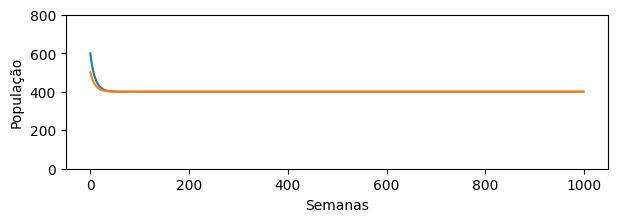

In [18]:
import matplotlib.pyplot as plt
A = np.array([[0.8, 0.2], [-0.1,  1.1]])
x = np.array([[600], [500]])
populacao_carcaras = []
populacao_sapos = []
for _ in range(1000):
    populacao_carcaras.append(x[0,0])
    populacao_sapos.append(x[1,0])
    x = A @ x

plt.figure(figsize=(7,2))
plt.plot(populacao_carcaras, label='Carcarás')
plt.plot(populacao_sapos, label='Sapos (* 1000)')
plt.ylim([0,800])
plt.ylabel('População')
plt.xlabel('Semanas')
plt.show()

a) Usando a função `np.linalg.eig`, encontre os auto-valores e auto-vetores da matriz que representa a dinâmica da população de carcarás e sapos. 


In [14]:
w, v = np.linalg.eig(A)
print(w, v)

#temos um auto-valor == 1 que indica estabilidade 
#temos um auto-valor < 1 que indica colapso
#um auto-valor > 1 indica expansão

[0.9 1. ] [[-0.89442719 -0.70710678]
 [-0.4472136  -0.70710678]]



b) Qual é o auto-vetor correspondente ao auto-valor $1$?


-0.70710678
-0.70710678


c) Como esse auto-vetor corresponde à dinâmica de população que observamos ao simular o sistema?



In [ ]:
print(w)
print(v)
print( v[:,1]/v[0,1] )
print( x / x[0,0])



d) O que acontece com o sistema se as condições iniciais forem iguais ao auto-vetor correspondente ao outro auto-valor?



In [ ]:
x = v[:,0].reshape( (2,1))
x *= -100
print(x)
import matplotlib.pyplot as plt
A = np.array([[0.8, 0.2], [-0.1,  1.1]])
populacao_carcaras = []
populacao_sapos = []
for _ in range(100):
    populacao_carcaras.append(x[0,0])
    populacao_sapos.append(x[1,0])
    x = A @ x

plt.figure(figsize=(7,2))
plt.plot(populacao_carcaras, label='Carcarás')
plt.plot(populacao_sapos, label='Sapos (* 1000)')
#plt.ylim([0,800])
plt.ylabel('População')
plt.xlabel('Semanas')
plt.show()



e) Explique essa dinâmica usando o conceito de auto-valores e auto-vetores, isto é, a equação $Ax = x \lambda$ onde $A$ é a matriz da dinâmica, $x$ é o auto-vetor e $\lambda$ é o auto-valor correspondente.

# Exercício 4
*Objetivo: encontrar uma matriz à partir de seus auto-valores e auto-vetores*

Em algumas situações (por exemplo, quando estou montando essa lista de exercícios - mas, de forma mais geral, quando estamos projetando sistemas dinâmicos), gostaríamos de encontrar matrizes que têm os autovalores e autovetores que queremos. Para isso, vamos escrever a equação de autovetores e autovalores na forma matricial.

Quando estamos falando de somente um auto-vetor, podemos escrever:

$$
Ax = x \lambda
$$

Porém, se tivermos dois auto-vetores, e seus auto-valores correspondentes, temos na verdade um sistema:

$$
\begin{cases}
Ax_1 = x_1 \lambda_1 \\
Ax_2 = x_2 \lambda_2 
\end{cases}
$$

Esse sistema pode ser escrito na forma de uma multiplicação matricial, se assumirmos que nossos auto-vetores são vetores-coluna:

$$
A \begin{bmatrix} x_1 & x_2 \end{bmatrix} = \begin{bmatrix} x_1 & x_2 \end{bmatrix} \begin{bmatrix} \lambda_1 & 0 \\ 0 & \lambda_2 \end{bmatrix} 
$$

Multiplicando os dois lados da equação por $\begin{bmatrix} x_1 & x_2 \end{bmatrix}^{-1}$, ficamos com:

$$
A \begin{bmatrix} x_1 & x_2 \end{bmatrix}\begin{bmatrix} x_1 & x_2 \end{bmatrix}^{-1} = \begin{bmatrix} x_1 & x_2 \end{bmatrix} \begin{bmatrix} \lambda_1 & 0 \\ 0 & \lambda_2 \end{bmatrix} \begin{bmatrix} x_1 & x_2 \end{bmatrix}^{-1}
$$

e, portanto:
$$
A = \begin{bmatrix} x_1 & x_2 \end{bmatrix} \begin{bmatrix} \lambda_1 & 0 \\ 0 & \lambda_2 \end{bmatrix} \begin{bmatrix} x_1 & x_2 \end{bmatrix}^{-1}
$$

Por exemplo, se quiséssemos uma matriz cujos auto-valores são $0.7$ e $0.2$ e os auto-vetores correspondentes são $[1,0]^T$ e $[0.5, 0.5]^T$, então deveríamos calcular:

$$
A = \begin{bmatrix} 1 & 0.5 \\ 0 & 0.5 \end{bmatrix} \begin{bmatrix} 0.7 & 0 \\ 0  & 0.2 \end{bmatrix} \begin{bmatrix} 1 & 0.5 \\ 0 & 0.5 \end{bmatrix}^{-1}
$$

Encontre a matriz com autovetores $[1,0]^T$ e $[0.5, 0.5]^T$ e autovalores $0.7$ e $0.2$.

In [24]:
S = np.array( [[1, 0], [0.5, 0.5]]).T
L = np.array( [ [0.7, 0], [0, 0.2] ])
S @ L @ np.linalg.inv(S)

array([[ 0.7, -0.5],
       [ 0. ,  0.2]])

In [25]:
import matplotlib.pyplot as plt
S = np.array( [[1, 0.5], [1.5, 0.5]]).T
L = np.array( [ [1, 0], [0, 1] ])
A_din = S @ L @ np.linalg.inv(S)
print(A_din)
x = np.array([[1000, 1100]]).T
print(x)


[[1. 0.]
 [0. 1.]]
[[1000]
 [1100]]


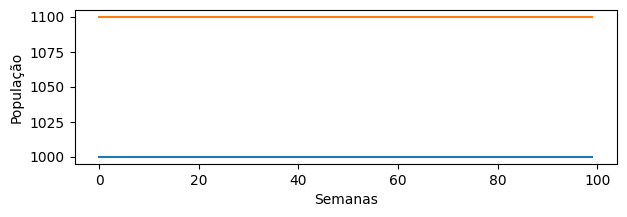

In [26]:

populacao_carcaras = []
populacao_sapos = []
for _ in range(100):
    populacao_carcaras.append(x[0,0])
    populacao_sapos.append(x[1,0])
    x = A_din @ x

plt.figure(figsize=(7,2))
plt.plot(populacao_carcaras, label='Carcarás')
plt.plot(populacao_sapos, label='Sapos (* 1000)')
#plt.ylim([0,800])
plt.ylabel('População')
plt.xlabel('Semanas')

plt.show()

# Exercício 5
*Objetivo: relacionar autovalores ao colapso, explosão e ao equilíbrio de sistemas dinâmicos*

Até o momento, usamos um vetor $v$ para representar o estado de sistemas - a quantidade de bicicletas nas estações em algum momento, a quantidade de animais em alguma semana, e assim por diante. Vamos chamar nossa condição inicial de $v_0$, significando o vetor de estados $v$ no tempo $0$ (e, portanto, $v_1$ é o estado após uma iteração, e $v_{223}$ é o estado após $223$ iterações).

Quando aplicamos uma matriz sobre um vetor de estados qualquer $v_0$, isto é, quando damos um passo em nosso sistema dinâmico, temos a situação:

$$
v_1 = A v_{0}
$$

Podemos aplicar novamente a matriz sobre $v_1$, encontrando:
$$
v_2 = A v_1 = A A v_0 = A^2 v_0.
$$

E, ao longo de $N$ iterações, teremos:
$$
v_N = A^N v_0
$$
---

Isso é  o que fizemos diversas vezes até este momento. Vamos agora re-escrever essa mesma equação na usando a forma de autovalores e autovetores. As passagens que seguem parecem um pouco longas porque as expressões são longas, mas são somente a consequência de trocar $A$ nas equações acima pela decomposição matricial:

$$
A = \begin{bmatrix} x_1 & x_2 \end{bmatrix} \begin{bmatrix} \lambda_1 & 0 \\ 0 & \lambda_2 \end{bmatrix} \begin{bmatrix} x_1 & x_2 \end{bmatrix}^{-1}
$$

Aplicando essa mudança na primeira expressão, temos:

$$
v_1 = A v_0 = \begin{bmatrix} x_1 & x_2 \end{bmatrix} \begin{bmatrix} \lambda_1 & 0 \\ 0 & \lambda_2 \end{bmatrix} \begin{bmatrix} x_1 & x_2 \end{bmatrix}^{-1} v_{0}
$$

Na segunda iteração, temos:

$$
v_2 = A v_1 = \left( A \right) A v_0 = \left( \begin{bmatrix} x_1 & x_2 \end{bmatrix} \begin{bmatrix} \lambda_1 & 0 \\ 0 & \lambda_2 \end{bmatrix} \begin{bmatrix} x_1 & x_2 \end{bmatrix}^{-1} \right) \begin{bmatrix} x_1 & x_2 \end{bmatrix} \begin{bmatrix} \lambda_1 & 0 \\ 0 & \lambda_2 \end{bmatrix} \begin{bmatrix} x_1 & x_2 \end{bmatrix}^{-1}v_0
$$

Veja que podemos simplificar a multiplicação $ \begin{bmatrix} x_1 & x_2 \end{bmatrix}^{-1} \begin{bmatrix} x_1 & x_2 \end{bmatrix}$ no meio da cadeia de multiplicações, já que ela é igual à identidade. Ficamos então com:

$$
v_2 = \begin{bmatrix} x_1 & x_2 \end{bmatrix} \begin{bmatrix} \lambda_1 & 0 \\ 0 & \lambda_2 \end{bmatrix} \begin{bmatrix} \lambda_1 & 0 \\ 0 & \lambda_2 \end{bmatrix} \begin{bmatrix} x_1 & x_2 \end{bmatrix}^{-1}v_0
$$

Podemos resumir a multiplicação matricial $\begin{bmatrix} \lambda_1 & 0 \\ 0 & \lambda_2 \end{bmatrix} \begin{bmatrix} \lambda_1 & 0 \\ 0 & \lambda_2 \end{bmatrix}$ como $\begin{bmatrix} \lambda_1 & 0 \\ 0 & \lambda_2 \end{bmatrix}^2$, ficando com:

$$
v_2 = \begin{bmatrix} x_1 & x_2 \end{bmatrix} \begin{bmatrix} \lambda_1 & 0 \\ 0 & \lambda_2 \end{bmatrix} ^2 \begin{bmatrix} x_1 & x_2 \end{bmatrix}^{-1}v_0
$$

Fazendo uma nova multiplicação por $A$, vamos encontrar:
$$
v_3 = \left( A \right) v_2 = \left( \begin{bmatrix} x_1 & x_2 \end{bmatrix} \begin{bmatrix} \lambda_1 & 0 \\ 0 & \lambda_2 \end{bmatrix} \begin{bmatrix} x_1 & x_2 \end{bmatrix}^{-1} \right) \begin{bmatrix} x_1 & x_2 \end{bmatrix} \begin{bmatrix} \lambda_1 & 0 \\ 0 & \lambda_2 \end{bmatrix} ^2 \begin{bmatrix} x_1 & x_2 \end{bmatrix}^{-1}v_0
$$

Novamente, podemos trocar a multiplicação matricial $ \begin{bmatrix} x_1 & x_2 \end{bmatrix}^{-1} \begin{bmatrix} x_1 & x_2 \end{bmatrix}$ pela identidade, e agrupar $\begin{bmatrix} \lambda_1 & 0 \\ 0 & \lambda_2 \end{bmatrix} \begin{bmatrix} \lambda_1 & 0 \\ 0 & \lambda_2 \end{bmatrix}^2$ como $\begin{bmatrix} \lambda_1 & 0 \\ 0 & \lambda_2 \end{bmatrix}^3$, ficando com:

$$
v_3 = \begin{bmatrix} x_1 & x_2 \end{bmatrix} \begin{bmatrix} \lambda_1 & 0 \\ 0 & \lambda_2 \end{bmatrix} ^3 \begin{bmatrix} x_1 & x_2 \end{bmatrix}^{-1} v_0
$$

Podemos fazer essa mesma operação $N$ vezes, ficando com:

$$
v_N = \begin{bmatrix} x_1 & x_2 \end{bmatrix} \begin{bmatrix} \lambda_1 & 0 \\ 0 & \lambda_2 \end{bmatrix} ^N \begin{bmatrix} x_1 & x_2 \end{bmatrix}^{-1} v_0
$$

Como $\begin{bmatrix} \lambda_1 & 0 \\ 0 & \lambda_2 \end{bmatrix} ^N = \begin{bmatrix} \lambda_1 ^N & 0 \\ 0 & \lambda_2 ^N \end{bmatrix}$, a expressão fica:

$$
v_N = \begin{bmatrix} x_1 & x_2 \end{bmatrix} \begin{bmatrix} \lambda_1^N & 0 \\ 0 & \lambda_2^N \end{bmatrix} \begin{bmatrix} x_1 & x_2 \end{bmatrix}^{-1} v_0
$$

---

Veja que agora sabemos que:
$$
A^N = \begin{bmatrix} x_1 & x_2 \end{bmatrix} \begin{bmatrix} \lambda_1^N & 0 \\ 0 & \lambda_2^N \end{bmatrix} \begin{bmatrix} x_1 & x_2 \end{bmatrix}^{-1}
$$ 

Usando valores à sua escolha e supondo que $A \in \mathbb{R}^{2\times 2}$, monte exemplos que mostrem o que acontece com os valores de $A^N$ se:

1. Todos os auto-valores forem positivos e menores que 1.
2. Somente um auto-valor for igual a 1, e os demais forem positivos e menores que 1.
3. Um dos auto-valores for maior que 1.
4. Todos os auto-valores forem iguais a 1.
5. Relacione as suas respostas anteriores aos conceitos de *explosão* (tender ao infinito ao longo de muitas iterações), *colapso* (tender a zero ao longo de muitas iterações) e *equilíbrio* (tender a um valor constante não-zero ao longo de muitas iteraçõees).

In [27]:
S = np.array( [[1, 0], [0.5, 0.5]]).T # Provavelmente podemos resolver este exercício sem alterar isso.
L = np.array( [ [0.7, 0], [0, 0.2] ]) # Você provavelmente quer alterar esta linha!


# Exercício 6
*Objetivo: relacionar colapso, explosão e equilíbrio situações práticas*

Neste exercício, estamos buscando entender como podemos usar a equação que vimos acima:

$$
v_N = \begin{bmatrix} x_1 & x_2 \end{bmatrix} \begin{bmatrix} \lambda_1^N & 0 \\ 0 & \lambda_2^N \end{bmatrix} \begin{bmatrix} x_1 & x_2 \end{bmatrix}^{-1} v_0
$$

pode ser usada para encontrar comportamentos ao longo do tempo em sistemas dinâmicos.


(a) Usando auto-valores e auto-vetores no caso da população de carcarás, justifique matematicamente o fato de que muito provavelmente a população deve tender a um equilíbrio ao longo de muitos meses. 

In [28]:
A = np.array([[0.8, 0.2], [-0.1,  1.1]])
w, v = np.linalg.eig(A)
print(w)
print(v)

[0.9 1. ]
[[-0.89442719 -0.70710678]
 [-0.4472136  -0.70710678]]


(b) Partindo do caso da população de carcarás, suponha a seguinte situação. A população local decidiu que existem muitos carcarás nas redondezas, e por isso autorizou a caça. Com isso, ao fim do mês, ao invés de morrerem 20% dos carcarás existentes, morrem 80% dos carcarás existentes. Use auto-valores e auto-vetores para prever se esse processo de caça será eficaz para conter a população de carcarás. Após, confirme seu resultado usando uma simulação.

[0.22279981 1.07720019]
[[-0.99356476 -0.22229356]
 [-0.11326545 -0.97497978]]


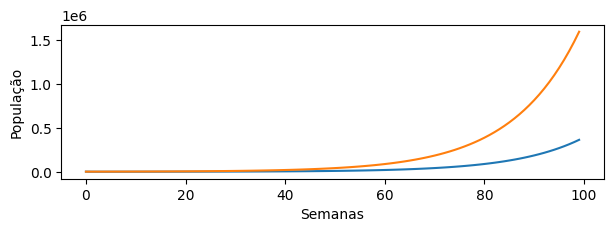

In [31]:
A = np.array([[0.2, 0.2], [-0.1,  1.1]]) # Depois da caça, a nova matriz A ficou assim!!!

w, v = np.linalg.eig(A)
print(w)
print(v)
x = np.array([[1000, 1100]]).T

populacao_carcaras = []
populacao_sapos = []
for _ in range(100):
    populacao_carcaras.append(x[0,0])
    populacao_sapos.append(x[1,0])
    x = A @ x

plt.figure(figsize=(7,2))
plt.plot(populacao_carcaras, label='Carcarás')
plt.plot(populacao_sapos, label='Sapos (* 1000)')
# plt.ylim([0,800])
plt.ylabel('População')
plt.xlabel('Semanas')

plt.show()

(c) Após a publicação de imagens chocantes sobre a caça dos carcarás, foram aprovadas leis de proteção e cuidado ambiental que fazem com que a mortalidade dos carcarás de um mês para o outro seja de apenas 19%. Usando auto-valores e auto-vetores, determine qual é o efeito dessa lei, a longo prazo, para as populações de carcarás e sapos na região.

[0.92298438 0.98701562]
[[-0.87067303 -0.74882458]
 [-0.49186226 -0.66276824]]


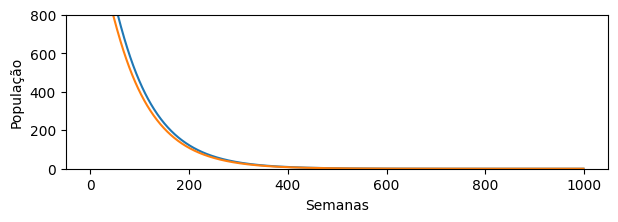

In [33]:
A = np.array([[0.81, 0.2], [-0.1,  1.1]]) # Depois da nova legislação, a nova matriz A ficou assim!!!


w, v = np.linalg.eig(A)
print(w)
print(v)

x = np.array([[1000, 1100]]).T

populacao_carcaras = []
populacao_sapos = []
for _ in range(1000):
    populacao_carcaras.append(x[0,0])
    populacao_sapos.append(x[1,0])
    x = A @ x

plt.figure(figsize=(7,2))
plt.plot(populacao_carcaras, label='Carcarás')
plt.plot(populacao_sapos, label='Sapos (* 1000)')
# plt.ylim([0,800])
plt.ylabel('População')
plt.xlabel('Semanas')

plt.show()

# Parte 2

# Exercício 7
*Objetivo: representar dados numéricos em uma matriz*

Quando vamos processar uma grande quantidade de dados, podemos representá-los usando, por exemplo, dataframes de Pandas:

In [34]:
import pandas as pd
import numpy as np
col1 = np.random.randn(5)
col2 = np.random.randn(5)
df = pd.DataFrame()
df['col1'] = col1
df['col2'] = col2
print(df.head())

       col1      col2
0  0.992616  1.746988
1  0.858051 -0.168247
2  0.452451 -0.073656
3  1.349206  0.808691
4 -1.804538 -0.076471


Podemos passar nossos dados para um array de Numpy usando:

In [35]:
data = df[['col1', 'col2']].to_numpy()
print(data)

[[ 0.99261611  1.74698839]
 [ 0.85805129 -0.16824675]
 [ 0.45245106 -0.07365624]
 [ 1.34920628  0.80869145]
 [-1.80453768 -0.0764713 ]]


Neste exercício, temos o objetivo de usar um array de numpy para substituir o dataframe. Usaremos o conjunto de dados [Automobile Data](https://www.kaggle.com/datasets/toramky/automobile-dataset), que é uma compilação de dados do *1985 Ward's Automotive Yearbook* e de informações fornecidas por companhias de seguro da época. Para este exercício, estamos especialmente interessados nas *features* *curb-weight* (o peso total de um veículo com o tanque cheio, sem contar os passageiros) e *highway-mpg* (o consumo de combustível do veículo, em milhas por galão).

(a) Modifique o código abaixo para que as duas colunas com dados fiquem em um numpy array `X` de dimensão `N x 2`, onde `N` é o número de veículos do dataset;

(b) Modifique o código abaixo para que a chamada `plt.scatter` use o array `X` ao invés de chamar o dataframe diretamente;

(c) Quais informações foram perdidas quando passamos a usar arrays de numpy no lugar de um dataframe?

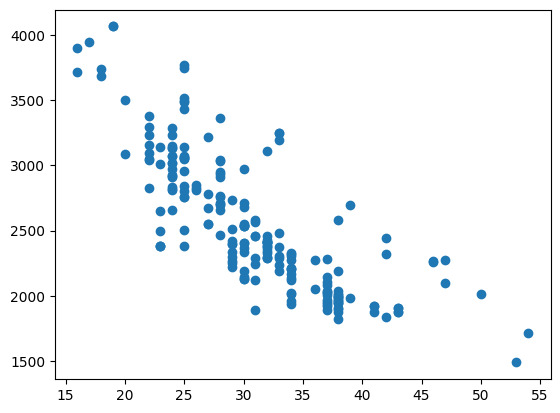

In [36]:
import matplotlib.pyplot as plt

df = pd.read_csv('Automobile_data.csv')
features = ["highway-mpg", "curb-weight"]
df = df[features]

plt.figure()
plt.scatter(df['highway-mpg'], df['curb-weight'])
plt.show()

# Exercício 8

*Objetivo: relacionar a equação da matriz de covariância a seu código computacional*

Lembre-se que a covariância entre duas colunas $x$ e $y$ de um `dataframe` é calculada por:

$$
C = \frac{\sum_{n=0}^{N-1} (x_n-\bar{x})(y_n-\bar{y})}{N-1}
$$

Podemos usar Pandas imediatamente para calcular a covariância entre todas as colunas de um dataframe usando:

In [37]:
df.cov()

,highway-mpg,curb-weight
highway-mpg,47.423099,-2859.417360
curb-weight,-2859.417360,271107.874319


Neste exercício, vamos implementar essa mesma operação em Numpy. Para isso, use o array $X$ que você criou no exercício anterior. Uma das opções é usar o procedimento abaixo:

(a) Centralizar cada coluna, isto é, subtrair, de cada coluna, seu valor médio (implementando as operações $x_n-\bar{x}$ e $y_n-\bar{y}$)

(b) Multiplicar as colunas elemento a elemento (usando o operador `*`)

(c) Somar o resultado da multiplicação ($np.sum$)

(d) Dividir o resultado por $N-1$.

Outra opção é usar a biblioteca `numpy` para calcular a matriz de covariância:

In [40]:
np.set_printoptions(suppress = True) #impede a notação científica

X = df.to_numpy()
y = np.mean(X, axis=0, keepdims=True) # calculando a media das duas colunas
X = X - np.mean(X, axis=0, keepdims=True) # Linha 2 # tirando de cada valor a media
C = X.T @ X # Linha 3 # multiplicando todos os valores de uma coluna com a outra
C /= X.shape[0]-1 # Linha 4

print(C)
np.cov(X.T) #da o mesmo resultado, então C = X^T X/N-1 dado que os dados foram centralizados 
# (tirado a media da coluna de todos os valores)


[[    47.423099    -2859.41736011]
 [ -2859.41736011 271107.87431851]]


array([[    47.423099  ,  -2859.41736011],
       [ -2859.41736011, 271107.87431851]])

Relacione cada uma das linhas do código acima a uma parte da equação da covariância.

# Exercício 9
*Objetivo: relacionar os autovetores da matriz de covariância à direção de espalhamento dos dados*

Os autovalores e autovetores da matriz de covariância podem ser calculados por:

In [47]:
w, v = np.linalg.eig(C)
print(w)
print()
print(v)
v0 = v[:,0]
v1 = v[:,1]

[    17.26245425 271138.03496326]

[[-0.99994438  0.01054724]
 [-0.01054724 -0.99994438]]


(a) Qual dos autovetores de $C$ está ligado a um autovalor mais alto?

(b) Use como base o código abaixo. Adicione nele uma reta na direção do autovetor que você escolheu no ítem (a). Você está buscando um resultado parecido com:

<img src="reta_pca_1.png"></img>

(c) O que a reta desenhada no ítem (b) indica sobre os seus dados?

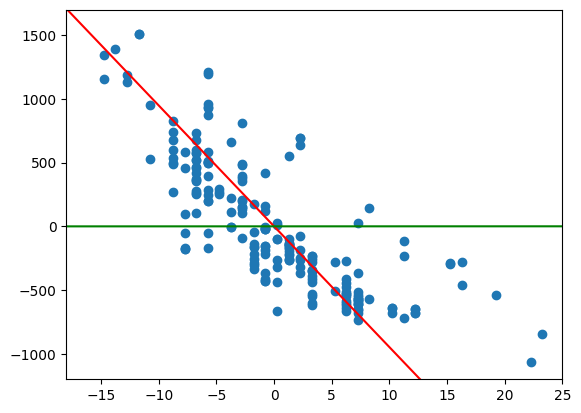

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

X = df.to_numpy()
X = X - np.mean(X, axis=0, keepdims=True) # Linha 2
C = X.T @ X # Linha 3
C /= X.shape[0]-1 # Linha 
w, v = np.linalg.eig(C)

auto_vetor1 = v[:,1]
auto_valor = w[1]
auto_vetor2 = v[:,0]

plt.figure()
plt.scatter(X[:,0], X[:,1])
plt.xlim(-18,25)
plt.plot([auto_vetor1[0]*-10000,auto_vetor1[0]*10000],[auto_vetor1[1]*-10000,auto_vetor1[1]*10000],c='r')
plt.plot([auto_vetor2[0]*-10000,auto_vetor2[0]*10000],[auto_vetor2[1]*-10000,auto_vetor2[1]*10000],c='g')
plt.ylim(-1200,1700)
plt.show()

# Exercício 10
*Objetivo: fazer uma projeção PCA como uma mudança de bases*

No exercício anterior, vimos que nossos pontos, embora tenham duas dimensões, podem ser razoavelmente bem explicados usando somente uma reta. Então, se pudermos projetar nossos pontos sobre essa reta, podemos reduzir o número de dimensões (ou: reduzir o número de *features*) relacionado a cada ponto.

Lembre-se que uma *base* significa que passamos a representar nossos pontos como a combinação linear de vetores-base. Se a base tem vetores-linha $v_1$ e $v_2$, então nossos pontos originais $X$ podem ser representados como pontos $Y$ se:

$$
 Y [v_1, v_2]^T= X
$$

Lembre-se que, neste caso, $X$ e $Y$ devem ter um ponto por linha e uma feature por coluna.

Então, podemos encontrar $Y$ usando:
$$
 Y = X ([v_1, v_2]^T) ^{-1}
$$

À partir do código abaixo, obtenha a matriz $Y$ e escolha somente a coluna correspondente à reta que você traçou no exercício anterior. Mostre, na figura abaixo, onde os pontos "reduzidos" de $Y$ devem aparecer na reta. Você deve encontrar algo parecido com:

<img src="projecao_pca_1.png"></img>

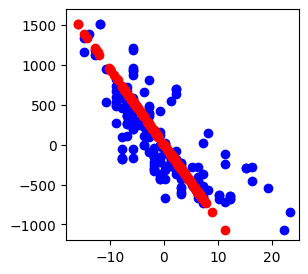

In [67]:
X = df.to_numpy()
X = X - np.mean(X, axis=0, keepdims=True)
# y= X@np.linalg.inv(v.T) matriz v é igual tanto transposta quanto normal
y = X@v 
#print(Y)
plt.figure(figsize=(3,3))

plt.scatter(X[:,0], X[:,1], c='b', label='Pontos originais')
plt.scatter(y[:,1]*v[0,1], y[:,1]*v[1,1], c='r', label='Pontos projetados')
plt.xlim(-18,25)
plt.ylim(-1200,1700)
plt.show()

# Parte 3

Nesta parte, vamos usar a ideia de projetar elementos em um espaço de dimensão mais baixa para visualizar dados.

Para isso, precisamos de um resultado teórico, que é o seguinte:

A matriz de auto-vetores $P$ da matriz de covariância $C$ é ortonormal, isto é:

$$
P^{-1} = P^T
$$

A demonstração disso é opcional, embora interessante, e está num [arquivo separado](demonstracao_ortonormalidade.md).

# Exercício 11
**Objetivo: fazer uma projeção PCA para visualizar dados de alta dimensão**

Existe um problema que encontramos em muitos conjuntos de dados, que é o fato de eles terem *muitas* features. Quando isso acontece, é difícil visualizar os nossos pontos. Uma das possíveis soluções para isso é encontrar os auto-vetores e auto-valores da matriz de covariância dos dados, e então usar somente os dois auto-vetores ligados aos maiores auto-valores para projetar nossos dados. Desta forma, temos uma projeção que permite a visualização dos dados levando à pouca distorção de suas posições.

Este procedimento se chama Análise de Componentes Principais, ou Principal Component Analysis (PCA). Trata-se de um algoritmo bem conhecido, que está executado abaixo.

Partindo do código, responda:

a) Quantas features existem na variável `X` originalmente?

b) Qual é a dimensão da matriz de covariância `C`?

c) Qual é a linha que seleciona os auto-vetores relacionados aos maiores auto-valores?

d) Qual é a linha que projeta as features `X` sobre a base formada pelos dois auto-vetores escolhidos?

e) Por que a forma $Y = XV$ é equivalente a $Y = X(V^{-1})^T$? Dica: use a demonstração acima!

f) Quantas features há em $Y$?

In [74]:
a = np.array([5,10,3,2])
np.argsort(a)

#a) 10, features é o numero de colunas 

#b) 10 x 10

#c

array([3, 2, 0, 1])

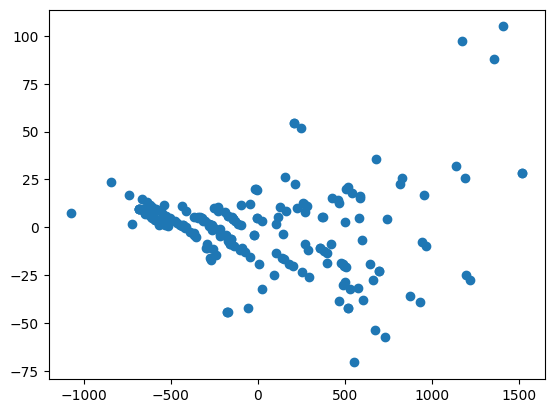

In [75]:
# Carregando dados novamente
df = pd.read_csv('Automobile_data.csv').select_dtypes(['number'])
X = df.to_numpy()

# Calculando matriz de covariância
X = X - np.mean(X, axis=0, keepdims=True)
C = X.T @ X
C /= X.shape[0]-1
w, v = np.linalg.eig(C)

w_ = np.argsort(w)

V = v [ :, [w_[-1], w_[-2]]]
Y = X @ V

plt.figure()
plt.scatter(Y[:,0], Y[:,1])
plt.show()


# Exercício 12
**Objetivo: usar a biblioteca sklearn para realizar uma projeção PCA**

O código abaixo exemplifica o uso da biblioteca `sklearn` para realizar uma projeção PCA equivalente à que fizemos acima.

a) Observando as figuras geradas, você diria que os códigos fazem procedimentos equivalentes?

b) A variável `pca.components_` mostra os componentes principais encontrados pela projeção. Como ela se relaciona à matriz `V` do exercício acima?

c) A variável `pca.explained_variance_ratio` mostra o quanto da variância dos dados está explicada por cada componente da projeção. Verificando os resultados desta projeção, você diria que é seguro assumir que os dados estão praticamente posicionados sobre uma reta?

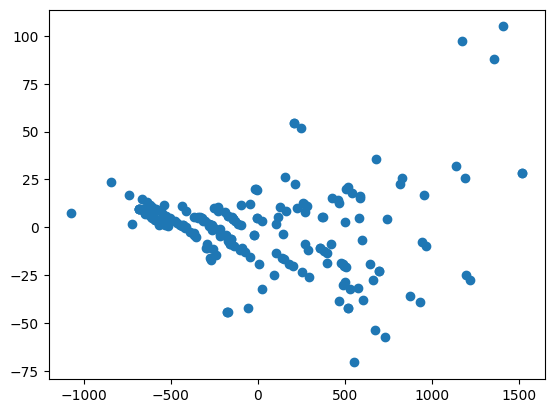

[[-0.00054215  0.00895069  0.02073686  0.00356278  0.00137928  0.9973234
   0.06796253  0.00114694 -0.00949286 -0.01051998]
 [ 0.01030769 -0.05217141 -0.07595278 -0.00116602 -0.04100802 -0.06550985
   0.99201139 -0.03605804 -0.00645257 -0.00031476]
 [-0.07908923  0.32029232  0.35106095  0.03712346  0.16098236 -0.00511749
   0.06955305  0.41067966  0.54661588  0.51798643]
 [ 0.04243432 -0.31344065 -0.80349366 -0.05238402 -0.1206205   0.03045384
  -0.07104473  0.23071315  0.30077792  0.29561482]
 [ 0.17854266 -0.60921638  0.3632513  -0.00385991 -0.22268623 -0.00517407
   0.0054046   0.6131802  -0.18911275 -0.06010651]]
[0.99785579 0.00176616 0.00016719 0.00014251 0.00002687]


In [85]:
from sklearn.decomposition import PCA

df = pd.read_csv('Automobile_data.csv').select_dtypes(['number'])
X = df.to_numpy()
pca = PCA(5)
Y = pca.fit_transform(X)

plt.figure()
plt.scatter(Y[:,0], Y[:,1])
plt.show()

print(pca.components_)
print(pca.explained_variance_ratio_)

# Parte 4

# Exercício 13
**Objetivo: ligar a decomposição por auto-valores e auto-vetores ao seu respectivo código computacional e verificar sua limitação para matrizes quadradas**

Já sabemos que uma matriz quadrada $X$ pode ser decomposta em termos de seus auto-vetores (na matriz $P$) e auto-valores (na diagonal da matriz $D$) na forma:

$$
A = P D P^{-1}.
$$

O código abaixo realiza essa decomposição e a recomposição.

a) Por que a matriz `B` no código é igual à matriz `A`?

b) Modifique o código para que a matriz `A` deixe de ser quadrada (por exemplo, adicionando uma linha ou coluna). Que erro é apontado no código?

c) Se a matriz $A$ na equação $A = P D P^{-1}$ não for quadrada, que problema deve aparecer na operação $P D P^{-1}$ em relação à dimensões de $P$ e $D$?


In [ ]:
A = np.array( [[1, 2], [2, 3]] )
w, v = np.linalg.eig(A)
#print(w, v)
w_ = np.diag(w)
#print(w_)
B = v @ w_ @ np.linalg.inv(v)

print(B)

# Exercício 14
**Objetivo: entender SVD como uma decomposição**

Quando calculamos $P$ e $D$ em $A=PDP^{-1}$, estamos *decompondo* a matriz $A$ em *componentes* ($P$, $D$ e $P^{-1}$).

Essa decomposição não é a única possibilidade. Uma outra, muito utilizada, é a decomposição em valores singulares (*Singular Value Decomposition*, ou **SVD**):

$$
A = U \Sigma V^T
$$

No código abaixo:

a) Confirme que a matriz `B` é igual à matriz `A`

b) Compare o conteúdo das matrizes `u`, `sigma` e `vt` ao conteúdo das matrizes `v` e `w_` no exercício anterior.

c) Altere o código para verificar se a decomposição SVD ainda funciona se a matriz `A` não for quadrada.

d) Se a matriz `A` não é quadrada, quais são as dimensões das matrizes `u`, `sigma` e `vt`?

e) O que a função `diagsvd` faz, e por que ela tem três parâmetros?

In [18]:
from scipy.linalg import svd, diagsvd
import numpy as np
A = np.array( [[1, 2], [2, 3]] )
u, s, vt = svd(A)
sigma = diagsvd(s, A.shape[0], A.shape[1]) #valores, e passando o tamanho certo pras transformações
# s são os auto-valores, 

B = u @ sigma @ vt
print(A)
print(B)

[[1 2]
 [2 3]]
[[1. 2.]
 [2. 3.]]


# Exercício 15
**Objetivo: comparar SVD ao PCA**

Na decomposição SVD, usamos a formulação:

$
A = U \Sigma V^T,
$

onde:

* As colunas de $U$ são os auto-vetores de $A^T A$,
* As colunas de $V$ (e, portanto, as linhas de $V^T$) são auto-vetores de $A A^T$,
* $\Sigma$ é uma matriz onde $s_{i,i}$ é a raiz quadrada dos auto-valores de $A^T A$ ou de $A A^T$.

A [demonstração disso está aqui](./demonstracao_svd.md), e uma outra perspectiva sobre essa demonstração está [aqui](https://gregorygundersen.com/blog/2018/12/20/svd-proof/).


---

Na decomposição PCA, calculamos a matriz de covariância $C = A A^T$ e fazemos a projeção:

$
C = P D P^T,
$

onde:

* As colunas de $P$ são os auto-vetores de $C=A A^T$,
* A diagonal principal de $D$ tem os auto-valores de $C$.

---

Lembrando-se disso:

a) Como poderíamos usar a decomposição SVD para encontrar os componentes principais de $A$? 

b) Seria correto dizer que: "a decomposição SVD e a decomposição PCA são a mesma decomposição"?

# Exercício 16
**Objetivo: Manipular a matriz $\Sigma$ em uma imagem e verificar os resultados**

O código abaixo abre uma imagem em tons de cinza e faz uma decomposição SVD.

a) Qual é a dimensão da imagem lida?

b) Quais são as dimensões das matrizes `u`, `sigma` e `vt`?

c) Os valores da matriz `sigma` vêm da matriz `s`. O que acontece com a imagems se o primeiro elemento de `s` for modificado para ficar igual a `0` (dica: use `s[0] *= 0`)?

d) Remova progressivamente mais elementos da matriz `s` igualando-os a zero. O que acontece com a imagem formada?

e) Agora, remova elementos do *final* da matriz `s` igualando-os a zero. O que acontece com a imagem?

f) Experimente perceptualmente e verifique quantos elementos você consegue remover do final da matriz `s` até que perceba alguma diferença na imagem?

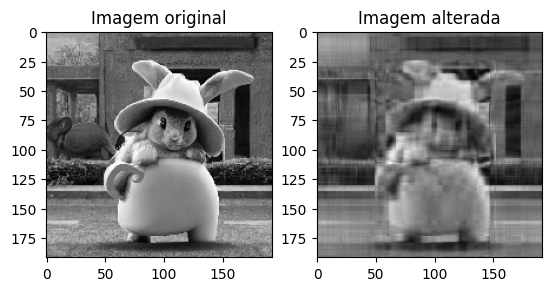

In [3]:
from scipy.linalg import svd, diagsvd
import matplotlib.image as mpimg

A = mpimg.imread("rabbit.jpeg").mean(axis=2)[0::4,0::4]

u, s, vt = svd(A)

# Altere daqui para baixo
s = s
s[-180:] *= 0.0   # podemos apagar os 100 ultimos autovalores que não estraga a imagem
# Altere daqui para cima

sigma = diagsvd(s, A.shape[0], A.shape[1])

B = u @ sigma @ vt

plt.subplot(1,2,1)
plt.title('Imagem original')
plt.imshow(A, cmap='gray')
plt.subplot(1,2,2)
plt.title('Imagem alterada')
plt.imshow(B, cmap='gray')
plt.show()

# Exercício 17
**Objetivo: Remover ruídos de uma imagem manipulando a matriz S**

Uma possível maneira de remover ruídos de uma imagem é a seguinte:

* Fazemos a decomposiçao SVD da imagem
* Removemos os elementos de menor magnitude da matriz $\Sigma$
* Reconstituímos a imagem

a) Aplique esse procedimento para tentar remover os ruídos que foram adicionados à imagem abaixo.

b) Qual é a relação entre o ruído removido da imagem e a distorção causada na imagem?

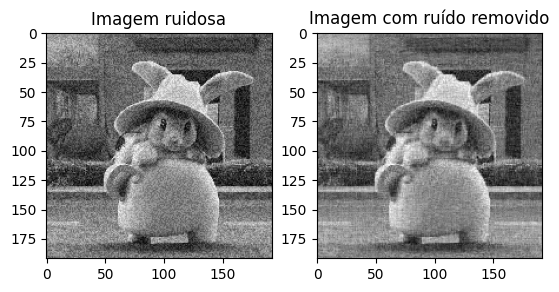

In [4]:
from scipy.linalg import svd, diagsvd
import matplotlib.image as mpimg

A = mpimg.imread("rabbit.jpeg").mean(axis=2)[0::4,0::4]
alpha = 0.3
A += alpha * np.random.random(A.shape) * np.max(A)

u, s, vt = svd(A)

# Altere daqui para baixo
s = s
s[-150:] *= 0
# Altere daqui para cima

sigma = diagsvd(s, A.shape[0], A.shape[1])

B = u @ sigma @ vt


plt.subplot(1,2,1)
plt.title('Imagem ruidosa')
plt.imshow(A, cmap='gray')
plt.subplot(1,2,2)
plt.title('Imagem com ruído removido')
plt.imshow(B, cmap='gray')
plt.show()

# Exercício 18
**Objetivo: Comprimir uma imagem modificando a matriz $\Sigma$**

Muitas vezes, admitimos perdas em um processo de compressão. Isso acontece, por exemplo, em compressão de imagens ou de sons: uma pequena distorção, quase imperceptível, é aceitável, desde que isso possibilite comprimir dados.

A compressão de dados funciona "apagando" elementos de uma imagem ou de um som. As diferentes estratégias de compressão se diferenciam em *como escolher* os elementos que são mais imperceptíveis dentro de uma imagem ou som.

Nesta atividade, vamos fazer um compressor de imagens baseado em SVD. O método aplicado é bem conhecido, e uma boa explicação dele pode ser encontrada [aqui](https://medium.com/balabit-unsupervised/image-compression-using-singular-value-decomposition-de20451c69a3).

Veja que, quando eliminamos valores de $\Sigma$ fazendo-os ficar igual a zero, isso é equivalente a remover alguns elementos das matrizes $U$ e de $V^T$. Por exemplo, na decomposição:

$$
U \Sigma V^T = 
\begin{bmatrix}
1 & 2 \\
3 & 4
\end{bmatrix}
\begin{bmatrix}
1 & 0 \\
0 & 0.2
\end{bmatrix}
\begin{bmatrix}
4 & 3 \\
2 & 1
\end{bmatrix}
$$

Se eliminamos o valor $0.2$ de $\Sigma$, ficamos com:

$$ 
\begin{bmatrix}
1 & 2 \\
3 & 4
\end{bmatrix}
\begin{bmatrix}
1 & 0 \\
0 & 0
\end{bmatrix}
\begin{bmatrix}
4 & 3 \\
2 & 1
\end{bmatrix}

= 
\begin{bmatrix}
4 & 3 \\
12 & 9
\end{bmatrix}

$$

Isso é equivalente a simplemente remover esse valor de $\Sigma$, e remover as linhas e colunas de $U$ e $V^T$ que seriam multiplicadas por ele. Daí, ficamos com:
$$
\begin{bmatrix}
1  \\
3 
\end{bmatrix}
\begin{bmatrix}
1 
\end{bmatrix}
\begin{bmatrix}
4 & 3 \\
\end{bmatrix}
= 
\begin{bmatrix}
4 & 3 \\
12 & 9
\end{bmatrix}
$$

A vantagem de remover linhas e colunas diretamente é que passamos a precisar de menos espaço para armazenar nossos dados!

---

Analise o código abaixo. Ele é bastante parecido com o código acima, Altere a função `comprimir` para que ela realize a remoção de elementos que foi mostrada acima. Teste seu código!!!

a) Como o valor de $K$ influencia a compressão da imagem e a qualidade da imagem final?

b) Qual é o menor valor de $K$ para o qual a imagem não perde qualidade?

c) Qual é o maior valor de $K$ que permite reduzir o tamanho ocupado pela imagem?

Tamanho inicial da imagem (bytes):  1769472
Tamanho da representação comprimida:  1291080
Compressão: 0.7296413845486112


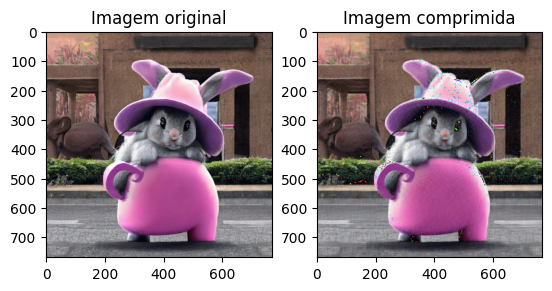

In [60]:
from scipy.linalg import svd, diagsvd
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np

# Altere esta função!
def comprimir (u, s, vt, K):
    """Remove elementos de u, s e vt deixando somente K componentes restantes
    """ 
    u_ = u[:,:K]
    s_ = s[:K]
    vt_ = vt[:K,:]
    return u_, s_, vt_

A = mpimg.imread("rabbit.jpeg")

u0, s0, vt0 = svd(A[:,:,0])  # fazendo separado pra cada cor porque uma imagem tem 3 dimensões
u1, s1, vt1 = svd(A[:,:,1])
u2, s2, vt2 = svd(A[:,:,2])

n_bytes_inicial = A.nbytes
print("Tamanho inicial da imagem (bytes): ", n_bytes_inicial)

K = 70

u0, s0, vt0 = comprimir(u0, s0, vt0, K)
u1, s1, vt1 = comprimir(u1, s1, vt1, K)
u2, s2, vt2 = comprimir(u2, s2, vt2, K)

sigma0 = diagsvd(s0, u0.shape[1], vt0.shape[0])
sigma1 = diagsvd(s1, u1.shape[1], vt1.shape[0])
sigma2 = diagsvd(s2, u2.shape[1], vt2.shape[0])

n_bytes_final = u0.nbytes + u1.nbytes + u2.nbytes + s0.nbytes + s1.nbytes + s2.nbytes + vt0.nbytes + vt1.nbytes + vt2.nbytes
print("Tamanho da representação comprimida: ", n_bytes_final)
print("Compressão:", n_bytes_final / n_bytes_inicial)

B = np.zeros_like(A)
B[:,:,0] = u0 @ sigma0 @ vt0
B[:,:,1] = u1 @ sigma1 @ vt1
B[:,:,2] = u2 @ sigma2 @ vt2

plt.subplot(1,2,1)
plt.title('Imagem original')
plt.imshow(A, cmap='gray')
plt.subplot(1,2,2)
plt.title('Imagem comprimida')
plt.imshow(B, cmap='gray')
plt.show()

# Projeto: O Desafio NetFlix
Outros datasets: https://github.com/caserec/Datasets-for-Recommender-Systems

Um problema que existe hoje em dia com as grandes empresas de streaming (Netflix, Spotify, etc.) é que elas têm um acervo de conteúdo muito grande, e os usuários tendem a gostar, cada um, de uma pequena parte desse acervo. Então, como poderíamos escolher quais filmes vão aparecer tela inicial do seu streaming?

O objetivo deste projeto é fazer um sistema que toma essa decisão.

## Quais dados temos à disposição?

Neste projeto, trabalharemos com o [The Movies Dataset](https://www.kaggle.com/datasets/rounakbanik/the-movies-dataset), que tem, entre outras coisas, a avaliação de usuários em relação a filmes. Essa avaliação está na tabela `ratings.csv` - mas, opcionalmente, pode ser usada a `ratings_small.csv`, que tem somente um subconjunto desses dados.

In [ ]:
import pandas as pd
df = pd.read_csv('ratings_small.csv')
df.head(2)

Veja que esse dataframe pode facilmente ser transformado numa matriz $A$ que tem uma linha para cada usuário (identificado por `userId`) e uma coluna para cada filme (identificado por `movieId`). O conteúdo da matriz é o *rating* que o usuário atribuiu ao filme. Podemos ignorar a coluna `timestamp`.

## Desafio: eu vou gostar deste filme?

O que gostaríamos de saber é qual nota um usuário deveria atribuir a um filme que ele ainda não assistiu. Para isso, o procedimento será o seguinte.

1. Vamos escolher aleatoriamente um dos elementos da matriz $A$ e atribuir a ele um valor aleatório, gerando a matriz $B$, isto é, a matriz $B$ é igual à matriz $A$ com um dos elementos "estragado".
1. O sistema receberá como entrada a matriz $B$ e a posição $i,j$ do valor aleatório. Neste momento, ele não teve acesso à matriz $A$, e, portanto, não tem como saber qual é o valor "real".
1. O sistema deverá retornar o valor real que estava na matriz $A$.
1. Esse procedimento deverá ser repetido várias vezes, de forma a gerar um histograma dos erros cometidos.

## Como o sistema funciona?

A ideia do sistema de recomendação é que existem "perfis" típicos de usuários. Os perfis, para este problema, são vetores que mostram que notas são tipicamente atribuídas para cada filme por usuários daquele perfil. Por exemplo, talvez tenhamos dois perfis e três filmes, e nesse caso poderíamos ter os perfis:

* $p_0 = [2, 5, 2]$, isto é, o perfil $0$ é de uma pessoa que gosta muito do filme $f_1$, e
* $p_1 = [5, 0, 4]$, isto é, o perfil $1$ é de uma pessoa que gosta dos filmes $f_0$ e $f_2$. 

Porém, sabemos que usuários reais raramente se comportam estritamente como um perfil. As notas realmente atribuídas por um usuário aos filmes, então, são modeladas como combinações lineares dos perfis. Por exemplo, podemos ter usuários:

* $u_0 = 0.1 p_0 + 0.9 p_1$, para um usuário muito próximo de $p_1$ mas distante de $p_0$,
* $u_1 = 0.1 p_0 + 0.1 p_1$, para um usuário distante tanto de $p_0$ quanto de $p_1$,

e assim por diante.

Então, o que precisamos é de uma maneira de mapear usuários para perfis, e então perfis para filmes. Precisamos então *decompor* nossa matriz $A$ de usuários $\times$ filmes em componentes:

$
A = X Y Z,
$

onde:
* $A$ tem uma linha por usuário e uma coluna por filme,
* $X$ tem uma linha por usuário e uma coluna por perfil,
* $Y$ é quadrada e mapeia perfis para perfis,
* $Z$ tem uma linha por perfil e uma coluna por filme.

Isso se parece bastante com algo que já fizemos nesta aula!

Em nosso teste, ao aleatorizarmos um elemento da matriz $A$, estamos inserindo ruído. Como poderíamos remover esse ruído?

## Descrição do projeto

Neste projeto, o grupo deverá fazer um sistema preditor de nota de filmes por usuário, que funciona nas condições que foram citadas no enunciado (temos conhecimento de todo o dataset, exceto do par filme-usuário específico). O sistema projetado deve ser avaliado usando um histograma dos erros ao longo de várias estimativas. O número de estimações deve ser, no mínimo, mil. O projeto deve ser colocado em um repositório GitHub específico.

Anotações importantes:

1. O grupo deve enviar um link para o repositório GitHub onde está localizada a biblioteca.
2. No diretório principal do repositório, deve haver um programa `demo.py`, que, quando executado, executa todos os testes que geram o histograma de resultados.
3. Como o objetivo do projeto é exatamente implementar o sistema de recomendação, não é permitido usar bibliotecas que fazem recomendações. Toda a parte de algoritmos e álgebra linear deve ser feita pelo próprio grupo usando Numpy ou Scipy.

**ENTREGAS**
* Link para o repositório onde está a biblioteca.
* No `README.md` do repositório, deve haver uma discussão sobre como o sistema funciona. Essa discussão deve corresponder ao que foi feito no código.
* Inclua também, no próprio `README.md`, instruções sobre como rodar o `demo.py` e como usar suas funcionalidades.
* O `README.md` também deve ter uma discussão dos resultados encontrados, incluindo o histograma dos erros e uma conclusão, baseada em dados, sobre se o grupo acredita que o sistema proposto poderia ser usado em produção.




**RUBRICA**

O projeto será avaliado usando três rubricas. Duas delas dizem respeito à redação e ao código apresentado, e são compartilhadas por todos os projetos. Este projeto tem ainda requisitos específicos que estão na rubrica abaixo. Os níveis são cumulativos, isto é, para passar de um nível, *todos* os requisitos dele devem ser cumpridos. A nota final é baseada na rubrica em que o trabalho obtiver o *menor* desempenho. As rubricas foram inspiradas nos níveis da [Taxonomia de Bloom](https://cft.vanderbilt.edu/guides-sub-pages/blooms-taxonomy/).


## Específica

| Nível | Descrição | [Tax. de Bloom](https://cft.vanderbilt.edu/guides-sub-pages/blooms-taxonomy/) |
| --- | --- | --- |
| F | Não entregue, entregue sem completar o `README.md`, entregue sem o `demo.py`, entregue sem resolver o problema que foi proposto, ou usando bibliotecas que resolvem o problema central do enunciado.  | Não fez |
| D | Entregue, mas o `README.md` não indica como instalar ou rodar o programa, ou o programa usa a matriz $A$ (sem ruído) como entrada ao invés da matriz $B$. | Entender |
| C | Devido a um erro de implementação ou de teoria, o sistema não retorna um valor coerente para o elemento faltante, isto é, simplesmente retorna um valor qualquer, aleatório, ou calculado sem base teórica adequada. | Compreender |
| B | O método foi aplicado corretamente. | Aplicar |
| A | Além da aplicação correta do método, o grupo realizou um teste de stress (devidamente documentado no README.md), verificando como o histograma de erro se comporta se mais dados da matriz de entrada forem "estragados" ao mesmo tempo. | Analisar |

## Argumentação

| Nível | Descrição |
| --- | --- |
| F | A argumentação apresentada não é clara o suficiente para permitir a reprodução do código computacional a partir dela por não existir ou por não citar ou descrever corretamente os elementos corretos que aparecem no código, ou é uma argumentação que se baseia unicamente na reprodução do código computacional, ou é uma argumentação factualmente incorreta ou que justifica um código factualmente incorreto. |
| E | A argumentação apresentada não é clara o suficiente para permitir a reprodução do código computacional a partir dela por não existir ou por não explicitar a relevância dos elementos que aparecem no código, ou é uma argumentação que se baseia unicamente em comentar o código computacional. |
| D | A argumentação apresentada não é clara o suficiente para permitir a reprodução do código computacional a partir dela por não apresentar uma articulação entre os elementos matemáticos semelhante à que aparece no código ou omitir passagens que não são triviais mas são necessárias para a compreensão da solução. |
| C | A argumentação apresentada permite a reprodução do código computacional, embora haja pequenos erros pontuais em aspectos que não são relevantes para a solução (exemplo: dizer que o algoritmo aplicado foi inventado em 1963 quando essa data não é correta). |
| B | A argumentação apresentada permite a reprodução do código computacional mas cita fatos que, embora corretos, são irrelevantes para o funcionamento (exemplo: dizer que o algoritmo aplicado foi inventado em 1963 quando, de fato, foi, embora essa data seja irrelevante para o código computacional).
| A | A argumentação está correta, completa e objetiva. As justificativas matemáticas são apresentadas de forma clara e organizada, sem erros ou equívocos, e correspondem imediatamente ao código apresentado. A solução apresentada é bem justificada e explica de forma completa o raciocínio por trás da resposta.


## Código computacional

| Rubrica | Descrição |
| --- | --- |
| F | O programa não funciona, não roda, ou resolve um problema diferente do proposto. |
| E | O programa apresenta problemas de implementação, como erros de lógica, que levam a resultados incorretos ou incompletos. |
| D | O programa apresenta uma solução algoritmica que não usa sua correspondência matemática ou não usa pacotes adequados em situações que esse uso seria muito simples (por exemplo: implementando uma multiplicação matricial com laços *for* aninhados, ao invés de usar a multiplicação matricial do Numpy). |
| C | O programa implementa corretamente uma solução matemáticamente correta e usa pacotes nas situações comuns, mas tem problemas de clareza como variáveis e funções com nomes que não correspondem ao seu conteudo/funcionalidade (ex: `var_1` ou `a1, a2, a3, a4`), ou deixar de usar ou comentar de forma lacônica o uso de construções da linguagem muito diferentes das que vimos em aula (ex: ao usar funções que nunca foram usadas em aula, ou pacotes que nunca foram usados, precisamos de um comentário como "a função X recebe A e retorna B, e por isso ela faz o papel da transformação T que foi discutida na argumentação"). |
| B | O programa implementa corretamente uma solução matemáticamente correta, com nomes de funções e variáveis auto-explicativos, está corretamente comentada, mas deixou de apagar instruções "print" que foram usadas para debug ou deixou de comentar corretamente o código ou deixou elementos que não deveriam estar em produção como nome da equipe, frases de efeito, ou outras questões de organização. |
| A | O programa implementa uma solução matemática correta e completa, com nomes de funções e variáveis que são auto-explicativos, e, sempre que possível, coincidem com os nomes usados na argumentação, e comentários detalhados que ligam o algoritmo mostrado a sua argumentação. |

# 